In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
corpus = "2021"

In [34]:
scores = pd.read_csv(f"controversy_results/controversy_scores_{corpus}.csv")
scores

,topic,score
0,101,2
1,102,3
2,103,4
3,104,3
4,105,3
5,106,3
6,107,2
7,108,4
8,109,3
9,110,2


In [35]:
df = scores.sort_values(by='score', ascending=False)
df = df.reset_index(drop=True)
df

,topic,score
0,130,5
1,139,4
2,103,4
3,147,4
4,108,4
5,137,3
6,127,3
7,128,3
8,129,3
9,131,3


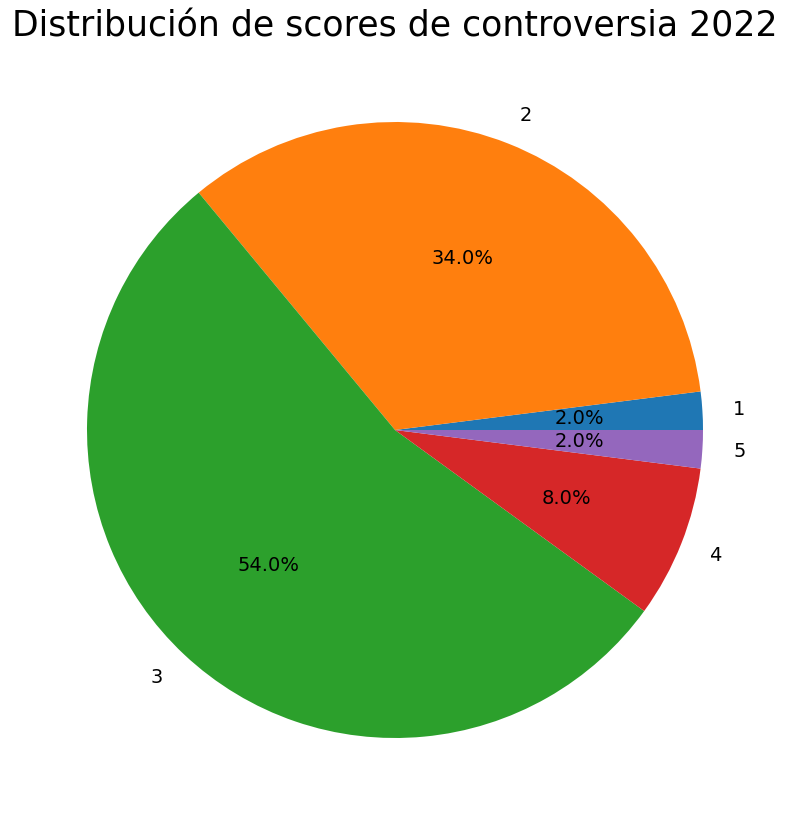

In [36]:
# Group by score and count the number of topics in each score group
df_grouped = df.groupby('score').count()
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={"topic": "count"})

# Do a pie chart
plt.figure(figsize=(10, 10))
plt.pie(df_grouped['count'], labels=df_grouped['score'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribución de scores de controversia 2022', fontsize=25)
plt.show()

In [37]:
df[df['score'] == 1]

,topic,score
49,140,1


In [38]:
comp_2020 = pd.read_csv('compatibility_2020_title.csv')
comp_2021 = pd.read_csv('compatibility_2021_title.csv')
comp_2022 = pd.read_csv('compatibility_2022_title.csv')
comp_clef = pd.read_csv('compatibility_clef.csv')

comp_2020 = comp_2020[comp_2020["run"] == "all_res_misinfo-2020_bm25_title.csv"]
comp_2021 = comp_2021[comp_2021["run"] == "all_res_C4-2021_bm25_query.csv"]
comp_2022 = comp_2022[comp_2022["run"] == "all_res_C4-2022_bm25_query.csv"]
comp_clef = comp_clef[comp_clef["run"] == "all_res_clueweb-b13_bm25.csv"]

comps = {"2020": comp_2020, "2021": comp_2021, "2022": comp_2022, "clef": comp_clef}

In [39]:
label_mapping = {
    "misinfo-qrels-graded.helpful-only": "helpful",
    "misinfo-qrels-graded.harmful-only": "harmful",
    "misinfo-qrels.graded-helpful-only": "helpful",
    "misinfo-qrels.graded-harmful-only": "harmful",
    "task1_qtrust_mapped_positive.tsv": "helpful",
    "task1_qtrust_mapped_negative.tsv": "harmful"
}

for comp in comps.values():
    comp["qrels"] = comp["qrels"].map(label_mapping)

comps["2020"]

,run,qrels,p,all,1,2,3,4,5,6,...,41,42,43,44,45,46,47,48,49,50
0,all_res_misinfo-2020_bm25_title.csv,helpful,0.95,0.2141,0.223,0.5490,0.3918,0.2105,0.0212,0.0043,...,0.0152,0.0378,0.0,0.0633,0.0076,NaN,0.8193,NaN,0.0322,0.3249
1,all_res_misinfo-2020_bm25_title.csv,harmful,0.95,0.0467,0.000,0.0147,NaN,0.0000,NaN,0.0366,...,0.0000,NaN,0.0,0.0168,0.1584,NaN,0.0002,NaN,0.1308,0.0514


In [40]:
for key, comp in comps.items():
    comp_diff = comp.loc[:, ~comp.columns.isin(['run', "qrels", "p", 'all'])]

    comp_diff = comp_diff.diff() * (-1)

    comp_diff["run"] = "all_res_misinfo-2020_bm25_title.csv"
    comp_diff["qrels"] = "diff"
    comp_diff["p"] = 0.95
    comp_diff["all"] = np.NaN
    comp_diff = comp_diff.iloc[1, :]

    comps[key] = pd.concat([comp, comp_diff.to_frame().T])

comps["2020"]
    

/tmp/ipykernel_85693/597008785.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comps[key] = pd.concat([comp, comp_diff.to_frame().T])
/tmp/ipykernel_85693/597008785.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comps[key] = pd.concat([comp, comp_diff.to_frame().T])
/tmp/ipykernel_85693/597008785.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determi

,run,qrels,p,all,1,2,3,4,5,6,...,41,42,43,44,45,46,47,48,49,50
0,all_res_misinfo-2020_bm25_title.csv,helpful,0.95,0.2141,0.223,0.549,0.3918,0.2105,0.0212,0.0043,...,0.0152,0.0378,0.0,0.0633,0.0076,NaN,0.8193,NaN,0.0322,0.3249
1,all_res_misinfo-2020_bm25_title.csv,harmful,0.95,0.0467,0.0,0.0147,NaN,0.0,NaN,0.0366,...,0.0,NaN,0.0,0.0168,0.1584,NaN,0.0002,NaN,0.1308,0.0514
1,all_res_misinfo-2020_bm25_title.csv,diff,0.95,NaN,0.223,0.5343,NaN,0.2105,NaN,-0.0323,...,0.0152,NaN,-0.0,0.0465,-0.1508,NaN,0.8191,NaN,-0.0986,0.2735


In [41]:
new_row = {col: np.nan for col in comps[corpus].columns}
new_row["run"] = "controversy"
new_row["qrels"] = "helpful"

for _, row in df.iterrows():
    col_name = str(row["topic"])
    if col_name in new_row:
        new_row[col_name] = float(row["score"])
    else:
        print("ERROR")

data = pd.concat([comps[corpus], pd.DataFrame([new_row])], ignore_index=True)
data = data.T
data

/tmp/ipykernel_85693/1359472186.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([comps[corpus], pd.DataFrame([new_row])], ignore_index=True)


,0,1,2,3
run,all_res_C4-2021_bm25_query.csv,all_res_C4-2021_bm25_query.csv,all_res_misinfo-2020_bm25_title.csv,controversy
qrels,helpful,harmful,diff,helpful
p,0.95,0.95,0.95,NaN
all,0.1292,0.1454,NaN,NaN
101,0.0839,0.0061,0.0778,2.0
102,0.0379,0.0858,-0.0479,3.0
103,0.0585,0.3721,-0.3136,4.0
104,0.0,0.1763,-0.1763,3.0
105,0.0101,0.0189,-0.0088,3.0
106,0.3858,0.0,0.3858,3.0


In [42]:
boxplot_data = data.iloc[4:, :].rename(columns={0: "helpful", 1: "harmful", 2: "diff", 3: "controversy"})
boxplot_data = boxplot_data.astype({"controversy": int})
boxplot_data

,helpful,harmful,diff,controversy
101,0.0839,0.0061,0.0778,2
102,0.0379,0.0858,-0.0479,3
103,0.0585,0.3721,-0.3136,4
104,0.0,0.1763,-0.1763,3
105,0.0101,0.0189,-0.0088,3
106,0.3858,0.0,0.3858,3
107,0.2618,0.0005,0.2613,2
108,0.0887,0.0346,0.0541,4
109,0.0521,0.3414,-0.2893,3
110,0.0822,0.3778,-0.2956,2


In [43]:
boxplot_data.corr()

,helpful,harmful,diff,controversy
helpful,1.000000,-0.268419,0.695936,0.070478
harmful,-0.268419,1.000000,-0.878553,0.302376
diff,0.695936,-0.878553,1.000000,-0.172175
controversy,0.070478,0.302376,-0.172175,1.000000


/tmp/ipykernel_85693/3098064620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='controversy', y='helpful', data=boxplot_data, palette="rocket_r")


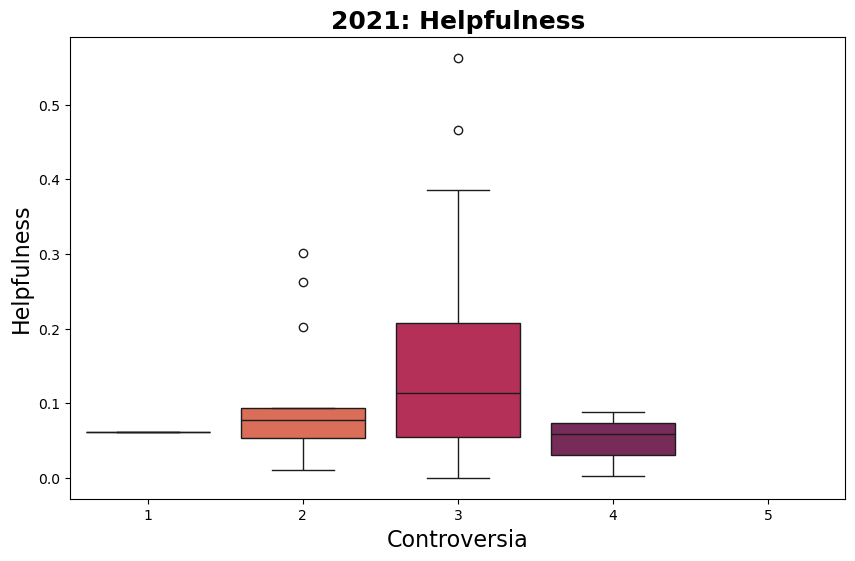

In [44]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy', y='helpful', data=boxplot_data, palette="rocket_r")

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Helpfulness", fontsize=16)
plt.title(f"{corpus.upper()}: Helpfulness", fontsize=18, fontweight="bold")

# Show the plot
plt.show()

/tmp/ipykernel_85693/3190567743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='controversy', y='harmful', data=boxplot_data, palette="rocket_r")
/tmp/ipykernel_85693/3190567743.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.xaxis.get_major_locator().set_params(integer=True)


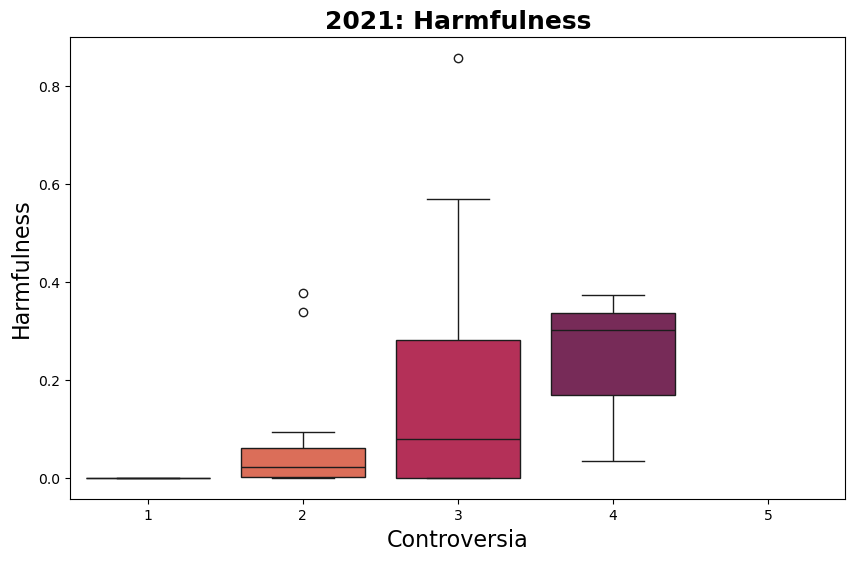

In [45]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy', y='harmful', data=boxplot_data, palette="rocket_r")

ax.xaxis.get_major_locator().set_params(integer=True)

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Harmfulness", fontsize=16)
plt.title(f"{corpus.upper()}: Harmfulness", fontsize=18, fontweight="bold")

# Show the plot
plt.show()

/tmp/ipykernel_85693/3551661289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='controversy', y='diff', data=boxplot_data, palette="rocket_r")
/tmp/ipykernel_85693/3551661289.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.xaxis.get_major_locator().set_params(integer=True)


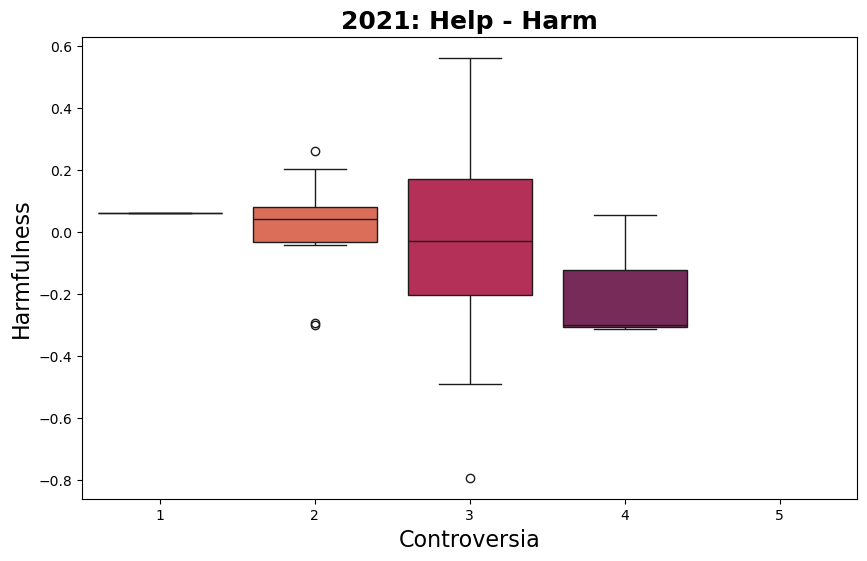

In [46]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy', y='diff', data=boxplot_data, palette="rocket_r")

ax.xaxis.get_major_locator().set_params(integer=True)

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Harmfulness", fontsize=16)
plt.title(f"{corpus.upper()}: Help - Harm", fontsize=18, fontweight="bold")

# Show the plot
plt.show()